In [1]:
import numpy as np
import pandas as pd
import math
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
def BlackScholesModel(option_type, F, K, sigma, T, r):
    d1 = (np.log(F *  np.exp(-r*T) / K) + (r + 0.5 * sigma**2)*T) / (sigma * np.sqrt(T))
    d2 = d1 - (sigma * np.sqrt(T))
    
    C = F * np.exp(-r*T) * norm.cdf(d1) - K * np.exp(-r*T)*norm.cdf(d2)    
    # using put-call parity to derive put option price
    P = K * np.exp(-r * T) - F * np.exp(-r*T) + C
    
    if option_type == "C":
        return max(C, 0)
    elif option_type =="P":
        return max(P, 0)
    else:
        return "Error"

In [3]:
def Implied_Volatility(option_type, real_price, F, K, T, r):
    # use bisection method to estimate implied volatility
    epsilon = 0.0001 # minimum estimation error
    volatility = 0.25 # initial guess of implied volatility
    upper_range = 0.5
    lower_range = 0
    max_iters = 200
    iters = 0
    
    while iters < max_iters:
        bs_price = BlackScholesModel(option_type=option_type, F=F, K=K, sigma=volatility, T=T, r=r)
        if abs(bs_price - real_price) < epsilon:
            return volatility
        if bs_price > real_price:
            tmp = volatility
            volatility = (volatility + lower_range)/2
            upper_range = tmp
        elif bs_price < real_price:
            tmp = volatility
            volatility = (volatility + upper_range)/2
            lower_range = tmp
        iters += 1

    return volatility

In [4]:
F = [16882]*8
K = [k for k in range(16700, 17051, 50)]
r = [0.0023]*8
T = [7/365]*8
c_bid = np.array([275, 242, 210, 179, 149, 124, 100, 79])
c_ask = np.array([338, 251, 215, 185, 151, 126, 102, 80])
c_price = (c_bid + c_ask) / 2
p_bid = np.array([66, 80, 95, 112, 131, 155, 181, 203])
p_ask = np.array([68, 82, 96, 115, 133, 158, 186, 214])
p_price = (p_bid + p_ask) / 2

data = pd.DataFrame({
    "台指期收盤價":F,
    "履約價":K,
    "無風險利率":r,
    "到期天數":T,
    "買權價格":c_price,
    "賣權價格":p_price
})

data

,台指期收盤價,履約價,無風險利率,到期天數,買權價格,賣權價格
0,16882,16700,0.0023,0.019178,306.5,67.0
1,16882,16750,0.0023,0.019178,246.5,81.0
2,16882,16800,0.0023,0.019178,212.5,95.5
3,16882,16850,0.0023,0.019178,182.0,113.5
4,16882,16900,0.0023,0.019178,150.0,132.0
5,16882,16950,0.0023,0.019178,125.0,156.5
6,16882,17000,0.0023,0.019178,101.0,183.5
7,16882,17050,0.0023,0.019178,79.5,208.5


In [5]:
data["買權隱含波動度"] = data.apply(lambda row: Implied_Volatility(option_type="C", real_price=row["買權價格"], F=row["台指期收盤價"], K=row["履約價"], T=row["到期天數"], r=row["無風險利率"]), axis = 1)

In [6]:
data["賣權隱含波動度"] = data.apply(lambda row: Implied_Volatility(option_type="P", real_price=row["賣權價格"], F=row["台指期收盤價"], K=row["履約價"], T=row["到期天數"], r=row["無風險利率"]), axis = 1)

In [7]:
data

,台指期收盤價,履約價,無風險利率,到期天數,買權價格,賣權價格,買權隱含波動度,賣權隱含波動度
0,16882,16700,0.0023,0.019178,306.5,67.0,0.218456,0.150410
1,16882,16750,0.0023,0.019178,246.5,81.0,0.185720,0.147473
2,16882,16800,0.0023,0.019178,212.5,95.5,0.180934,0.142396
3,16882,16850,0.0023,0.019178,182.0,113.5,0.177634,0.138307
4,16882,16900,0.0023,0.019178,150.0,132.0,0.170221,0.131590
5,16882,16950,0.0023,0.019178,125.0,156.5,0.167635,0.127804
6,16882,17000,0.0023,0.019178,101.0,183.5,0.163272,0.122878
7,16882,17050,0.0023,0.019178,79.5,208.5,0.158587,0.110470


In [8]:
BlackScholesModel("P", 16882, 17000, 0.15, 7/365, 0.0023)

207.19944282795677

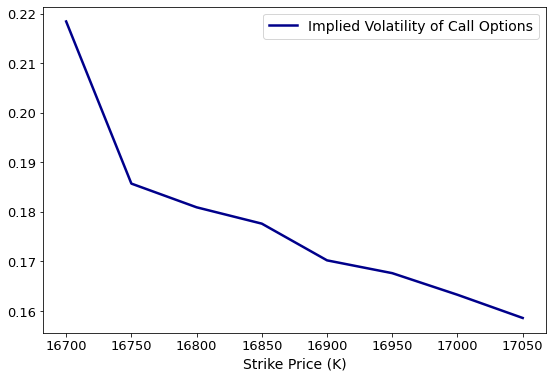

In [9]:
plt.figure(figsize=(9, 6))
plt.plot(data["履約價"], data["買權隱含波動度"], c="darkblue", linewidth=2.5)
plt.tick_params(axis='both', labelsize=13)
plt.xlabel("Strike Price (K)", fontsize=14)
plt.legend(["Implied Volatility of Call Options"], fontsize=14)
plt.savefig('Implied Volatility of Call Options.png', dpi=72)

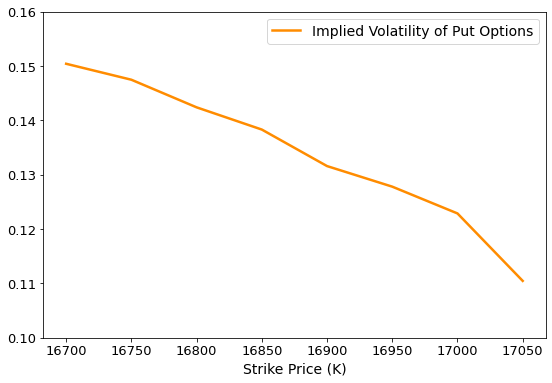

In [10]:
plt.figure(figsize=(9, 6))
plt.plot(data["履約價"], data["賣權隱含波動度"], c="darkorange", linewidth=2.5)
plt.tick_params(axis='both', labelsize=13)
plt.xlabel("Strike Price (K)", fontsize=14)
plt.ylim(0.1, 0.16)
plt.legend(["Implied Volatility of Put Options"], fontsize=14)
plt.savefig('Implied Volatility of Put Options.png', dpi=72)

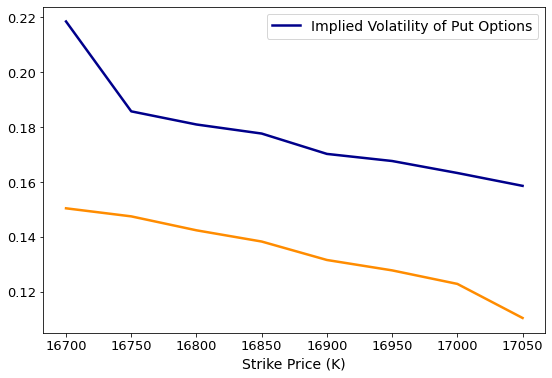

In [12]:
plt.figure(figsize=(9, 6))
plt.plot(data["履約價"], data["買權隱含波動度"], c="darkblue", linewidth=2.5)
plt.plot(data["履約價"], data["賣權隱含波動度"], c="darkorange", linewidth=2.5)
plt.tick_params(axis='both', labelsize=13)
plt.xlabel("Strike Price (K)", fontsize=14)
plt.legend(["Implied Volatility of Put Options"], fontsize=14)
plt.savefig('Implied Volatility of Put Options.png', dpi=72)